In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Data Set

In [2]:
data = pd.read_csv('archive2/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data Exploration

In [3]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
dummy = pd.get_dummies(data.ocean_proximity).astype(int)
dummy

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [5]:
data = data.join(dummy)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  <1H OCEAN           20640 non-null  int32  
 11  INLAND              20640 non-null  int32  
 12  ISLAND              20640 non-null  int32  
 13  NEAR BAY            20640 non-null  int32  
 14  NEAR OCEAN          20640 non-null  int32  
dtypes: float64(9), int32(5), object(1)
memory usage: 2.0+

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  <1H OCEAN           20433 non-null  int32  
 11  INLAND              20433 non-null  int32  
 12  ISLAND              20433 non-null  int32  
 13  NEAR BAY            20433 non-null  int32  
 14  NEAR OCEAN          20433 non-null  int32  
dtypes: float64(9), int32(5), object(1)
memory usage: 2.1+ MB


In [9]:
data = data.drop(['ocean_proximity'], axis=1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


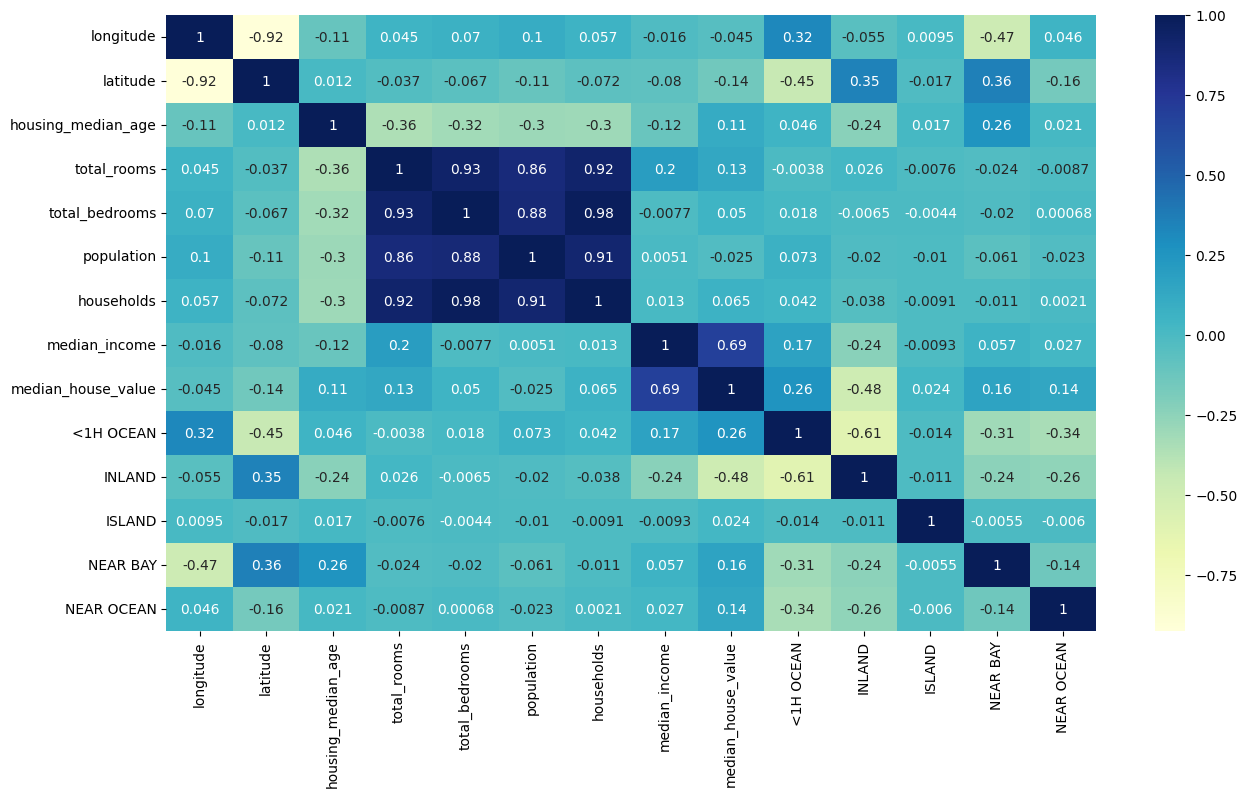

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

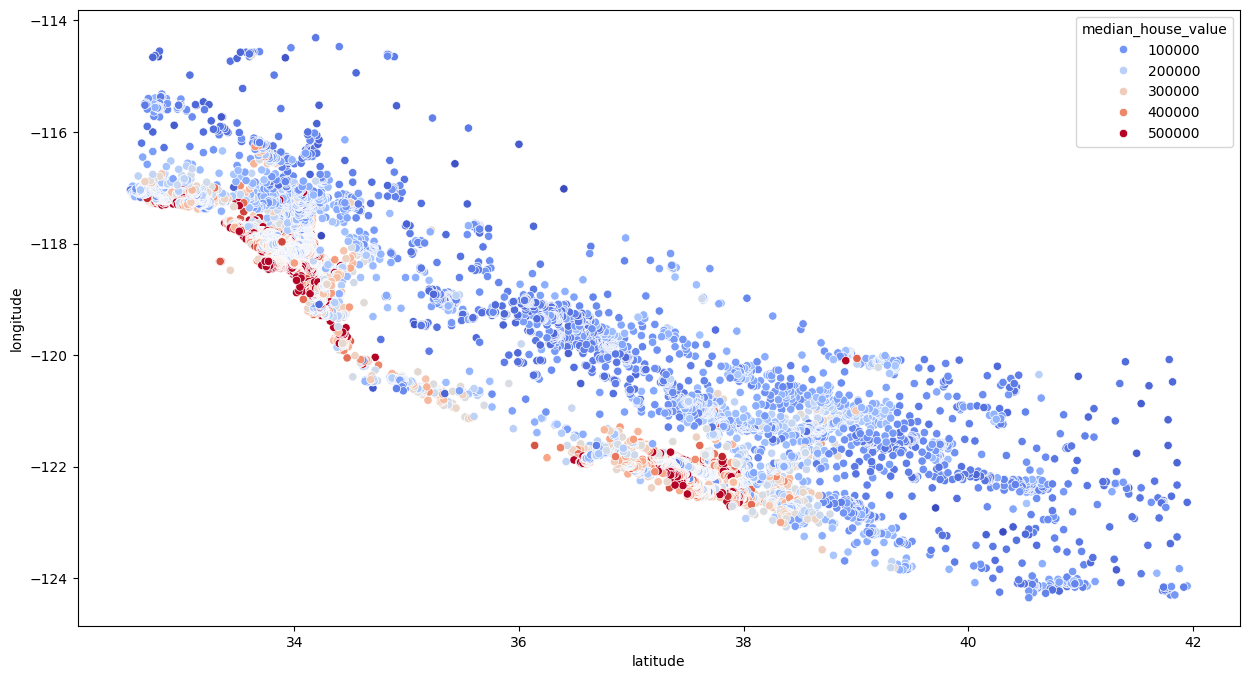

In [12]:
# we are going to look how positions influence the Median_house_values i.e. latitude, and longitude
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude',y='longitude', data=data, hue='median_house_value', palette='coolwarm')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,1,0,0,0,0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,0,1,0,0,0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,0,1,0,0,0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,1,0,0,0,0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,1,0,0,0,0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,1,0,0,0,0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,1,0,0,0,0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0,0,0,1,0


In [16]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,0,0,0,0,1
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,0,1,0,0,0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,1,0,0,0,0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,0,0,0,1,0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,3.5985,0,0,0,0,1
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,1,0,0,0,0
2997,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575,0,1,0,0,0
13440,-117.42,34.08,28.0,2300.0,419.0,1312.0,444.0,3.4844,0,1,0,0,0


In [17]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [21]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()

In [22]:
my_model.fit(X_train, y_train)

LinearRegression()

In [23]:
reg_pred=my_model.predict(X_test)

In [24]:
reg_pred

array([199698.62165535, 148114.62165535, 207506.62165535, ...,
       112978.62165535, 139794.62165535, 167442.62165535])

In [25]:
modelScore = my_model.score(X_test, y_test)
modelScore

0.6483877475835358

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))

4808361118.384935
50505.96623304535


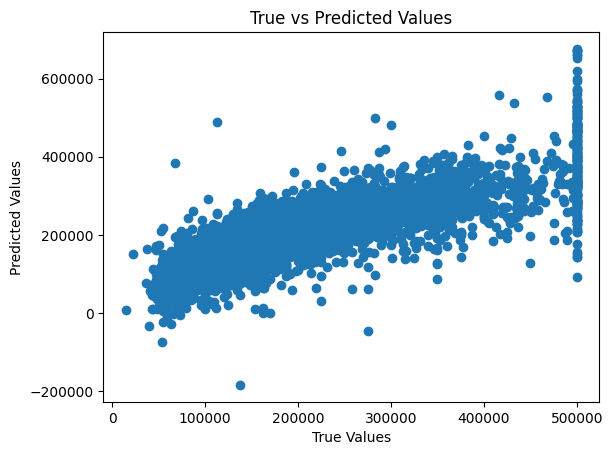

In [27]:
plt.scatter(y_test, reg_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

In [28]:
import pickle
pickle.dump(my_model,open('trained_model.pkl', 'wb'))